In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\SelviPandian'

In [3]:
os.chdir("C:\\Users\\SelviPandian\\Desktop\\game dataset")

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
train=pd.read_csv('train.csv')

In [6]:
train.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37


In [7]:
train.shape

(14576, 15)

In [8]:
test=pd.read_csv('test.csv')

In [9]:
test.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Nicktoons: MLB,X360,2011.0,Sports,Take-Two Interactive,0.12,0.00,0.0,NaN,NaN,7.6,7.0,High Voltage Software,E
1,Shonen Jump's One Piece: Grand Battle,PS2,2005.0,Fighting,Atari,0.07,0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Learn Math,DS,2009.0,Puzzle,DreamCatcher Interactive,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Dreamcatcher,E
3,Nitrobike,Wii,2008.0,Racing,Ubisoft,0.11,0.01,0.0,49.0,22.0,7.1,7.0,Left Field Productions,E10+
4,Cruise Ship Vacation Games,Wii,2009.0,Puzzle,Avanquest,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Activision,E


In [10]:
test.shape

(2143, 14)

In [11]:
df=pd.concat([train,test])

In [12]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37


In [37]:
type(df)

pandas.core.frame.DataFrame

In [13]:
pd.DataFrame(df['Name'])

,Name
0,Wii Sports
1,Super Mario Bros.
2,Mario Kart Wii
3,Wii Sports Resort
4,Pokemon Red/Pokemon Blue
...,...
2138,Theresia...
2139,Sacred 2: Fallen Angel
2140,Dance Sensation!
2141,Adventure Time: The Secret of the Nameless Kin...


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16719 entries, 0 to 2142
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   Critic_Count     8137 non-null   float64
 10  User_Score       10015 non-null  object 
 11  User_Count       7590 non-null   float64
 12  Developer        10096 non-null  object 
 13  Rating           9950 non-null   object 
 14  Global_Sales     14576 non-null  float64
dtypes: float64(8), object(7)
memory usage: 2.0+ MB


In [15]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Developer', 'Rating', 'Global_Sales'],
      dtype='object')

In [16]:
df.shape

(16719, 15)

In [17]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count,Global_Sales
count,16450.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,14576.000000
mean,2006.487356,0.263330,0.145025,0.077602,68.967679,26.360821,162.229908,0.598972
std,5.878995,0.813514,0.503283,0.308818,13.938165,18.980495,561.282326,1.647699
min,1980.000000,0.000000,0.000000,0.000000,13.000000,3.000000,4.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,60.000000,12.000000,10.000000,0.050000
50%,2007.000000,0.080000,0.020000,0.000000,71.000000,21.000000,24.000000,0.220000
75%,2010.000000,0.240000,0.110000,0.040000,79.000000,36.000000,81.000000,0.550000
max,2020.000000,41.360000,28.960000,10.220000,98.000000,113.000000,10665.000000,82.530000


In [18]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
Global_Sales       2143
dtype: int64

<AxesSubplot:>

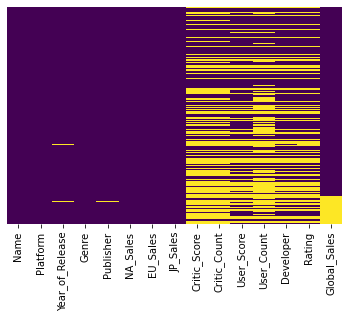

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
cat=df.select_dtypes(include='object')

In [21]:
cat.isnull().sum()

Name             2
Platform         0
Genre            2
Publisher       54
User_Score    6704
Developer     6623
Rating        6769
dtype: int64

In [22]:
(cat.isnull().sum()/cat.shape[0])*100

Name           0.011962
Platform       0.000000
Genre          0.011962
Publisher      0.322986
User_Score    40.098092
Developer     39.613613
Rating        40.486871
dtype: float64

In [23]:
for i in cat.columns:
    cat[i]=cat[i].fillna(cat[i].fillna(cat[i].dropna().mode().values[0]))

C:\Users\SELVIP~1\AppData\Local\Temp/ipykernel_29828/2672803337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat[i]=cat[i].fillna(cat[i].fillna(cat[i].dropna().mode().values[0]))


In [24]:
cat.isnull().sum()

Name          0
Platform      0
Genre         0
Publisher     0
User_Score    0
Developer     0
Rating        0
dtype: int64

In [25]:
cat.head()

,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
0,Wii Sports,Wii,Sports,Nintendo,8,Nintendo,E
1,Super Mario Bros.,NES,Platform,Nintendo,tbd,Ubisoft,E
2,Mario Kart Wii,Wii,Racing,Nintendo,8.3,Nintendo,E
3,Wii Sports Resort,Wii,Sports,Nintendo,8,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,tbd,Ubisoft,E


In [26]:
num=df.select_dtypes(exclude='object')
num

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count,Global_Sales
0,2006.0,41.36,28.96,3.77,76.0,51.0,322.0,82.53
1,1985.0,29.08,3.58,6.81,NaN,NaN,NaN,40.24
2,2008.0,15.68,12.76,3.79,82.0,73.0,709.0,35.52
3,2009.0,15.61,10.93,3.28,80.0,73.0,192.0,32.77
4,1996.0,11.27,8.89,10.22,NaN,NaN,NaN,31.37
...,...,...,...,...,...,...,...,...
2138,2008.0,0.05,0.00,0.00,61.0,6.0,8.0,NaN
2139,2008.0,0.00,0.05,0.00,71.0,41.0,203.0,NaN
2140,2010.0,0.06,0.00,0.00,NaN,NaN,NaN,NaN
2141,2014.0,0.00,0.05,0.00,58.0,5.0,4.0,NaN


In [27]:
num.isnull().sum()

Year_of_Release     269
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       8582
Critic_Count       8582
User_Count         9129
Global_Sales       2143
dtype: int64

In [28]:
for i in num.columns:
    num[i]=num[i].fillna(num[i].fillna(num[i].dropna().mode().values[0]))
    

C:\Users\SELVIP~1\AppData\Local\Temp/ipykernel_29828/2573451742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num[i]=num[i].fillna(num[i].fillna(num[i].dropna().mode().values[0]))


In [29]:
num.isnull().sum()

Year_of_Release    0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Critic_Score       0
Critic_Count       0
User_Count         0
Global_Sales       0
dtype: int64

In [30]:
num.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count,Global_Sales
0,2006.0,41.36,28.96,3.77,76.0,51.0,322.0,82.53
1,1985.0,29.08,3.58,6.81,70.0,4.0,4.0,40.24
2,2008.0,15.68,12.76,3.79,82.0,73.0,709.0,35.52
3,2009.0,15.61,10.93,3.28,80.0,73.0,192.0,32.77
4,1996.0,11.27,8.89,10.22,70.0,4.0,4.0,31.37


In [41]:
df1=pd.concat([num,cat],axis=1)
df1

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count,Global_Sales,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
0,2006.0,41.36,28.96,3.77,76.0,51.0,322.0,82.53,Wii Sports,Wii,Sports,Nintendo,8,Nintendo,E
1,1985.0,29.08,3.58,6.81,70.0,4.0,4.0,40.24,Super Mario Bros.,NES,Platform,Nintendo,tbd,Ubisoft,E
2,2008.0,15.68,12.76,3.79,82.0,73.0,709.0,35.52,Mario Kart Wii,Wii,Racing,Nintendo,8.3,Nintendo,E
3,2009.0,15.61,10.93,3.28,80.0,73.0,192.0,32.77,Wii Sports Resort,Wii,Sports,Nintendo,8,Nintendo,E
4,1996.0,11.27,8.89,10.22,70.0,4.0,4.0,31.37,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,tbd,Ubisoft,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,2008.0,0.05,0.00,0.00,61.0,6.0,8.0,0.02,Theresia...,DS,Adventure,Arc System Works,8,WorkJam,M
2139,2008.0,0.00,0.05,0.00,71.0,41.0,203.0,0.02,Sacred 2: Fallen Angel,PC,Role-Playing,Ascaron Entertainment GmbH,6.9,"Ascaron Entertainment GmbH, Ascaron Entertainment",M
2140,2010.0,0.06,0.00,0.00,70.0,4.0,4.0,0.02,Dance Sensation!,Wii,Misc,Majesco Entertainment,tbd,Ubisoft,E
2141,2014.0,0.00,0.05,0.00,58.0,5.0,4.0,0.02,Adventure Time: The Secret of the Nameless Kin...,X360,Action,Little Orbit,7.5,WayForward,E10+


In [36]:
type(df1)

pandas.core.frame.DataFrame

In [42]:
df1

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count,Global_Sales,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
0,2006.0,41.36,28.96,3.77,76.0,51.0,322.0,82.53,Wii Sports,Wii,Sports,Nintendo,8,Nintendo,E
1,1985.0,29.08,3.58,6.81,70.0,4.0,4.0,40.24,Super Mario Bros.,NES,Platform,Nintendo,tbd,Ubisoft,E
2,2008.0,15.68,12.76,3.79,82.0,73.0,709.0,35.52,Mario Kart Wii,Wii,Racing,Nintendo,8.3,Nintendo,E
3,2009.0,15.61,10.93,3.28,80.0,73.0,192.0,32.77,Wii Sports Resort,Wii,Sports,Nintendo,8,Nintendo,E
4,1996.0,11.27,8.89,10.22,70.0,4.0,4.0,31.37,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,tbd,Ubisoft,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,2008.0,0.05,0.00,0.00,61.0,6.0,8.0,0.02,Theresia...,DS,Adventure,Arc System Works,8,WorkJam,M
2139,2008.0,0.00,0.05,0.00,71.0,41.0,203.0,0.02,Sacred 2: Fallen Angel,PC,Role-Playing,Ascaron Entertainment GmbH,6.9,"Ascaron Entertainment GmbH, Ascaron Entertainment",M
2140,2010.0,0.06,0.00,0.00,70.0,4.0,4.0,0.02,Dance Sensation!,Wii,Misc,Majesco Entertainment,tbd,Ubisoft,E
2141,2014.0,0.00,0.05,0.00,58.0,5.0,4.0,0.02,Adventure Time: The Secret of the Nameless Kin...,X360,Action,Little Orbit,7.5,WayForward,E10+


In [32]:
rs = np.random.RandomState(0)
df1 = pd.DataFrame(rs.rand(10, 10))
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.347533,0.398948,0.455743,0.072914,-0.233402,-0.731222,0.477978,-0.442621,0.015185
1,0.347533,1.000000,-0.284056,0.571003,-0.285483,0.382480,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1.000000,-0.523649,0.152937,-0.139176,-0.092895,0.016266,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1.000000,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.446650
4,0.072914,-0.285483,0.152937,-0.225343,1.000000,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.382480,-0.139176,-0.227577,-0.104438,1.000000,-0.030252,0.417640,0.205851,0.095084
6,-0.731222,-0.362842,-0.092895,-0.481548,-0.147477,-0.030252,1.000000,-0.494440,0.381407,-0.353652
7,0.477978,0.642578,0.016266,0.473286,-0.523283,0.417640,-0.494440,1.000000,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1.000000,0.150421
9,0.015185,0.190047,-0.383585,0.446650,-0.189916,0.095084,-0.353652,0.417863,0.150421,1.000000


In [43]:
df1

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count,Global_Sales,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
0,2006.0,41.36,28.96,3.77,76.0,51.0,322.0,82.53,Wii Sports,Wii,Sports,Nintendo,8,Nintendo,E
1,1985.0,29.08,3.58,6.81,70.0,4.0,4.0,40.24,Super Mario Bros.,NES,Platform,Nintendo,tbd,Ubisoft,E
2,2008.0,15.68,12.76,3.79,82.0,73.0,709.0,35.52,Mario Kart Wii,Wii,Racing,Nintendo,8.3,Nintendo,E
3,2009.0,15.61,10.93,3.28,80.0,73.0,192.0,32.77,Wii Sports Resort,Wii,Sports,Nintendo,8,Nintendo,E
4,1996.0,11.27,8.89,10.22,70.0,4.0,4.0,31.37,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,tbd,Ubisoft,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,2008.0,0.05,0.00,0.00,61.0,6.0,8.0,0.02,Theresia...,DS,Adventure,Arc System Works,8,WorkJam,M
2139,2008.0,0.00,0.05,0.00,71.0,41.0,203.0,0.02,Sacred 2: Fallen Angel,PC,Role-Playing,Ascaron Entertainment GmbH,6.9,"Ascaron Entertainment GmbH, Ascaron Entertainment",M
2140,2010.0,0.06,0.00,0.00,70.0,4.0,4.0,0.02,Dance Sensation!,Wii,Misc,Majesco Entertainment,tbd,Ubisoft,E
2141,2014.0,0.00,0.05,0.00,58.0,5.0,4.0,0.02,Adventure Time: The Secret of the Nameless Kin...,X360,Action,Little Orbit,7.5,WayForward,E10+


In [50]:
df1.set_index('Name')

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count,Global_Sales,Platform,Genre,Publisher,User_Score,Developer,Rating
Name,,,,,,,,,,,,,,
Wii Sports,2006.0,41.36,28.96,3.77,76.0,51.0,322.0,82.53,Wii,Sports,Nintendo,8,Nintendo,E
Super Mario Bros.,1985.0,29.08,3.58,6.81,70.0,4.0,4.0,40.24,NES,Platform,Nintendo,tbd,Ubisoft,E
Mario Kart Wii,2008.0,15.68,12.76,3.79,82.0,73.0,709.0,35.52,Wii,Racing,Nintendo,8.3,Nintendo,E
Wii Sports Resort,2009.0,15.61,10.93,3.28,80.0,73.0,192.0,32.77,Wii,Sports,Nintendo,8,Nintendo,E
Pokemon Red/Pokemon Blue,1996.0,11.27,8.89,10.22,70.0,4.0,4.0,31.37,GB,Role-Playing,Nintendo,tbd,Ubisoft,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Theresia...,2008.0,0.05,0.00,0.00,61.0,6.0,8.0,0.02,DS,Adventure,Arc System Works,8,WorkJam,M
Sacred 2: Fallen Angel,2008.0,0.00,0.05,0.00,71.0,41.0,203.0,0.02,PC,Role-Playing,Ascaron Entertainment GmbH,6.9,"Ascaron Entertainment GmbH, Ascaron Entertainment",M
Dance Sensation!,2010.0,0.06,0.00,0.00,70.0,4.0,4.0,0.02,Wii,Misc,Majesco Entertainment,tbd,Ubisoft,E


# 

In [49]:
df1['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983., 2020., 2017.])

In [53]:
df1.Year_of_Release.value_counts().sort_index().to_frame().T

,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2020.0
Year_of_Release,9,46,36,17,14,14,21,16,15,17,...,1426,1255,1136,653,544,581,606,502,3,1


In [58]:
df1.Global_Sales.value_counts().sort_index().to_frame().T

,0.01,0.02,0.03,0.04,0.05,0.06,0.09,0.10,0.11,0.13,...,28.31,28.32,28.92,29.80,30.26,31.37,32.77,35.52,40.24,82.53
Global_Sales,638,3230,852,651,631,216,349,415,397,31,...,1,1,1,1,1,1,1,1,1,1


In [69]:
df_s = df1.loc[df['Platform'].isin(['PC','XOne','PS4'])]
df_s = df_s[['Year_of_Release','Name','Publisher','Global_Sales','Genre']]
df_s = df_s.pivot_table(index = ['Name','Year_of_Release'],
                                columns = 'Genre',
                                aggfunc = 'sum',
                                fill_value = 0)

In [70]:
df_s

Global_Sales            \
Genre                                                       Action Adventure   
Name                                  Year_of_Release                          
007: Quantum of Solace                2008.0                  0.03      0.00   
15 Days                               2009.0                  0.00      0.01   
1701 A.D.                             2006.0                  0.00      0.00   
18 Wheels of Steel: Extreme Trucker   2009.0                  0.00      0.00   
18 Wheels of Steel: Extreme Trucker 2 2011.0                  0.00      0.00   
...                                                            ...       ...   
Zoo Tycoon: Complete Collection       2003.0                  0.00      0.00   
Zumba Fitness: World Party            2013.0                  0.00      0.00   
[Prototype 2]                         2012.0                  0.11      0.00   
inFAMOUS: Second Son                  2014.0                  2.79      0.00   
pro evolution soccer 2011             2010.0                  0.00      0.00   

                                                                               \
Genre                                                 Fighting  Misc Platform   
Name                                  Year_of_Release                           
007: Quantum of Solace                2008.0               0.0  0.00      0.0   
15 Days                               2009.0               0.0  0.00      0.0   
1701 A.D.                             2006.0               0.0  0.00      0.0   
18 Wheels of Steel: Extreme Trucker   2009.0               0.0  0.00      0.0   
18 Wheels of Steel: Extreme Trucker 2 2011.0               0.0  0.00      0.0   
...                                                        ...   ...      ...   
Zoo Tycoon: Complete Collection       2003.0               0.0  0.00      0.0   
Zumba Fitness: World Party            2013.0               0.0  0.24      0.0   
[Prototype 2]                         2012.0               0.0  0.00      0.0   
inFAMOUS: Second Son                  2014.0               0.0  0.00      0.0   
pro evolution soccer 2011             2010.0               0.0  0.00      0.0   

                                                                     \
Genre                                                 Puzzle Racing   
Name                                  Year_of_Release                 
007: Quantum of Solace                2008.0             0.0   0.00   
15 Days                               2009.0             0.0   0.00   
1701 A.D.                             2006.0             0.0   0.00   
18 Wheels of Steel: Extreme Trucker   2009.0             0.0   0.02   
18 Wheels of Steel: Extreme Trucker 2 2011.0             0.0   0.02   
...                                                      ...    ...   
Zoo Tycoon: Complete Collection       2003.0             0.0   0.00   
Zumba Fitness: World Party            2013.0             0.0   0.00   
[Prototype 2]                         2012.0             0.0   0.00   
inFAMOUS: Second Son                  2014.0             0.0   0.00   
pro evolution soccer 2011             2010.0             0.0   0.00   

                                                                            \
Genre                                                 Role-Playing Shooter   
Name                                  Year_of_Release                        
007: Quantum of Solace                2008.0                   0.0     0.0   
15 Days                               2009.0                   0.0     0.0   
1701 A.D.                             2006.0                   0.0     0.0   
18 Wheels of Steel: Extreme Trucker   2009.0                   0.0     0.0   
18 Wheels of Steel: Extreme Trucker 2 2011.0                   0.0     0.0   
...                                                            ...     ...   
Zoo Tycoon: Complete Collection       2003.0                   0.0     0.0   
Zumba Fitness: World Pa